In [6]:
%autosave 10

Autosaving every 10 seconds


In [4]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['figure.dpi']=100

In [5]:
#importing dataset
df=pd.read_csv('Data set/cleaned_data.csv')

In [7]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [8]:
X=df['LIMIT_BAL'][0:10].values.reshape(-1,1)
X

array([[ 20000],
       [120000],
       [ 90000],
       [ 50000],
       [ 50000],
       [ 50000],
       [500000],
       [100000],
       [140000],
       [ 20000]], dtype=int64)

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df['LIMIT_BAL'].values.reshape(-1,1),df['default payment next month'].values,test_size=0.2,random_state=24)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


In [12]:
np.mean(y_train)

0.223102526838873

In [13]:
np.mean(y_test)

0.21657603600225014

_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [17]:
from sklearn.linear_model import LogisticRegression
my_lr = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True, \
                                intercept_scaling=1, max_iter=100, multi_class='auto', n_jobs=None, \
                                penalty='l2', random_state=None, solver='liblinear', tol=0.0001, \
                                verbose=0, warm_start=False)

In [18]:
my_lr.fit(X_train,y_train)


LogisticRegression(C=0.1, solver='liblinear')

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [20]:
y_pred=my_lr.predict(X_test)

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [23]:
from sklearn import metrics
metrics.confusion_matrix(y_test,y_pred)

array([[4178,    0],
       [1155,    0]], dtype=int64)

In [24]:
P = sum(y_test)
TP = sum( (y_test==1) & (y_pred==1) )
TPR = TP/P
FN = sum( (y_test==1) & (y_pred==0) )
FNR = FN/P

In [25]:
N = sum(y_test==0)
TN = sum((y_test==0) & (y_pred==0))
FP = sum((y_test==0) & (y_pred==1))
TNR = TN/N
FPR = FP/N

In [28]:
y_pred_proba = my_lr.predict_proba(X_test)
y_pred_proba

array([[0.74826924, 0.25173076],
       [0.584297  , 0.415703  ],
       [0.79604453, 0.20395547],
       ...,
       [0.584297  , 0.415703  ],
       [0.82721498, 0.17278502],
       [0.66393434, 0.33606566]])

In [29]:
prob_sum = np.sum(y_pred_proba,1)
prob_sum

array([1., 1., 1., ..., 1., 1., 1.])

In [30]:
prob_sum.shape

(5333,)

In [31]:
np.unique(prob_sum)

array([1.])

In [32]:
pos_proba = y_pred_proba[:,1]
pos_proba

array([0.25173076, 0.415703  , 0.20395547, ..., 0.415703  , 0.17278502,
       0.33606566])

In [33]:
pos_sample_pos_proba = pos_proba[y_test==1]
neg_sample_pos_proba = pos_proba[y_test==0]

***

**Now, plot the ROC curve.**

In [35]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)

Text(0.5, 1.0, 'ROC curve')

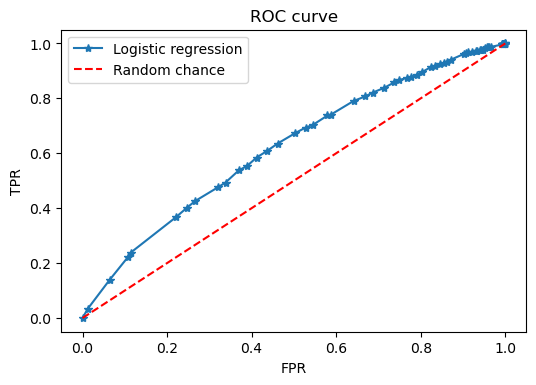

In [37]:
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

In [38]:
thresholds

array([1.48298465, 0.48298465, 0.46600867, 0.44911106, 0.4323301 ,
       0.415703  , 0.3992656 , 0.38305207, 0.3670946 , 0.35142324,
       0.33606566, 0.321047  , 0.30638978, 0.29211383, 0.27823623,
       0.26477132, 0.25173076, 0.23912359, 0.2269563 , 0.21523299,
       0.20395547, 0.19312344, 0.18273464, 0.17278502, 0.16326891,
       0.15417922, 0.14550758, 0.13724452, 0.12937966, 0.12190182,
       0.11479918, 0.10805946, 0.10166997, 0.09561779, 0.08988983,
       0.08447295, 0.07935404, 0.07452008, 0.0699582 , 0.06565578,
       0.06160044, 0.05778008, 0.05418298, 0.05079775, 0.04761337,
       0.04461922, 0.0418051 , 0.03916119, 0.03667808, 0.0343468 ,
       0.03215875, 0.03010574, 0.02817998, 0.02637405, 0.02468092,
       0.0230939 , 0.02021324, 0.01890793, 0.01654057, 0.01546869,
       0.01446524, 0.01033455, 0.00844134, 0.0078901 , 0.00644178])

In [39]:
metrics.roc_auc_score(y_test, pos_proba)

0.6201990844642832

_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


In [40]:
from sklearn.metrics import precision_recall_curve

In [41]:
precision,recall,thresholds=precision_recall_curve(y_test,pos_proba)

(0.0, 1.0)

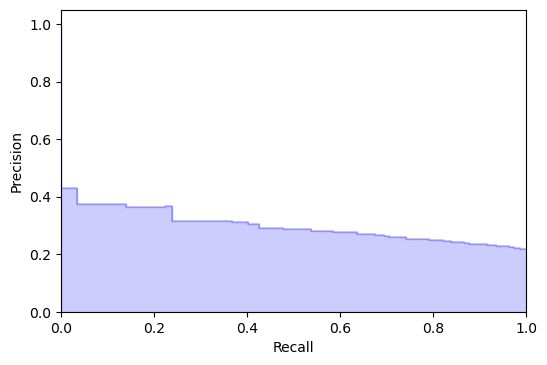

In [43]:
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])


_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

    How is this different, conceptually and quantitatively, from your earlier calculation?
